# Import Required Libraries and Load Cleaned Crime Data
This section imports the necessary libraries, applies a dark mode style for visualizations, and reads the cleaned crime dataset into a pandas DataFrame. 

- **Libraries**:
  - `sys` and `os`: For file path operations.
  - `pandas`: For data manipulation and analysis.
  - `matplotlib.pyplot` and `seaborn`: For data visualization.
  - `style_config`: A custom module for consistent dark mode styling.

- **Dark Mode Styling**:
  - The `apply_dark_mode_style` function is called to set up the visual theme for all plots.

- **Loading Data**:
  - The dataset `cleaned_crime_data.csv` is read from the `processed_data` folder.
  - Data types (`dtype`) are explicitly defined for use in analysis.



In [48]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from style_config import apply_dark_mode_style, COLORS, FONT_SIZES, FIGURE_SIZE, GRID_STYLE
# Apply dark mode style
apply_dark_mode_style()

cleaned_data = pd.read_csv(
    "../data/processed_data/cleaned_crime_data.csv",
    dtype={ 
        'zip': 'string',
        'latitude' : 'float64',
        'longitude' : 'float64',
        'irs_estimated_population' : 'Int64',
        'incident_number' : 'string',
        'offense_classification': 'category',
        'was_offense_completed': 'category',
        'location_category': 'category',
        'value_range': 'category',
        'week_day_reported': 'category',
        'week_day_occurred': 'category'
    },
    parse_dates=['date_reported', 'date_occurred']
)

# Most Common Days for Reported Auto Thefts
This code calculates and visualizes the number of reported auto thefts by day of the week.

Counts incidents in the `week_day_reported` column.
- **Insights**: Vehicles are reported most frequently on Monday.


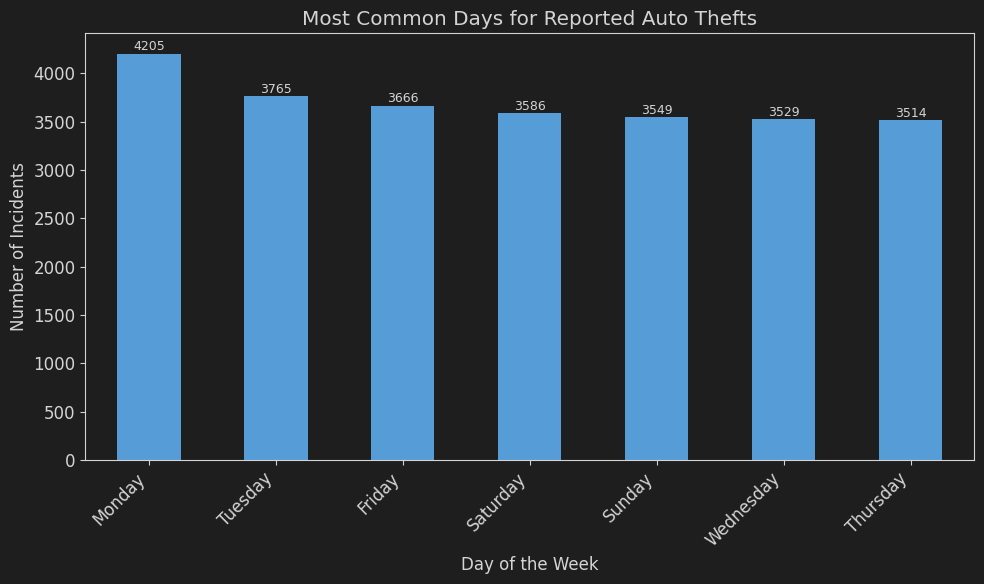

In [49]:
# Group by 'week_day_reported' and count incidents
most_common_days = cleaned_data['week_day_reported'].value_counts()

# Plot the data
plt.figure(figsize=FIGURE_SIZE)
bar_chart = most_common_days.plot(kind='bar', color=COLORS['primary'], title="Most Common Days for Reported Auto Thefts")
plt.xlabel("Day of the Week", fontsize=FONT_SIZES['axes'])
plt.ylabel("Number of Incidents", fontsize=FONT_SIZES['axes'])
plt.xticks(rotation=45, ha='right')

# Annotate bars with values
for index, value in enumerate(most_common_days):
    plt.text(index, value + value * 0.01, str(value), ha='center', fontsize=FONT_SIZES['annotations'])


plt.tight_layout()
plt.show()


# Auto Theft Trends Over the Years
Extracts yearly data and plots a line chart showing trends in auto theft incidents.
- **Insights**: 2023 saw a significant increase in vehicle thefts. 


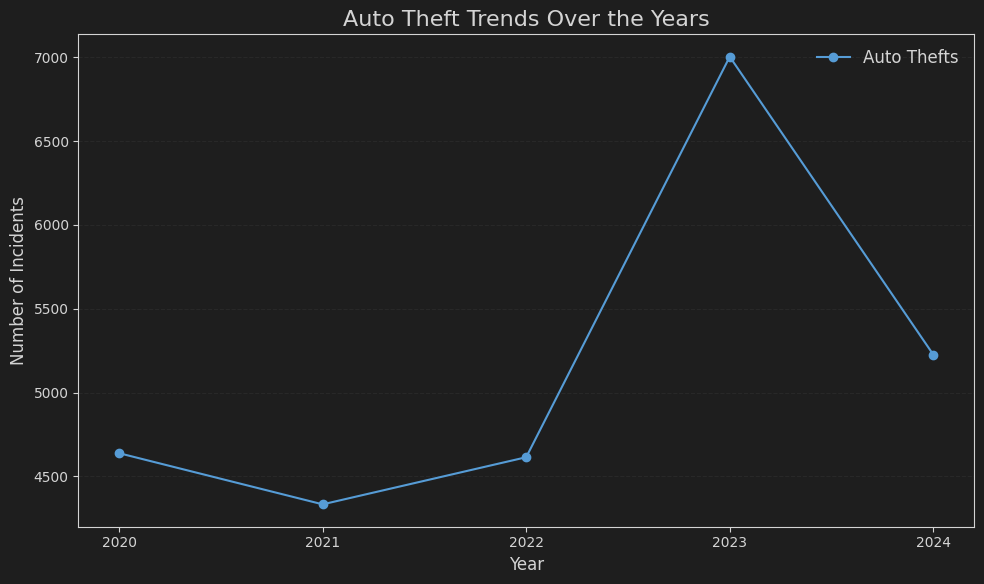

In [50]:
# Extract the year from the 'date_reported' column
cleaned_data['year_reported'] = cleaned_data['date_reported'].dt.year

# Group by year and count incidents
yearly_trends = cleaned_data.groupby('year_reported').size()

# Plot the trends
plt.figure(figsize=FIGURE_SIZE)
plt.plot(
    yearly_trends.index,
    yearly_trends.values,
    marker='o',
    color=COLORS['primary'],
    label="Auto Thefts"
)
plt.title("Auto Theft Trends Over the Years", fontsize=FONT_SIZES['title'])
plt.xlabel("Year", fontsize=FONT_SIZES['axes'])
plt.ylabel("Number of Incidents", fontsize=FONT_SIZES['axes'])
plt.grid(axis='y', color=COLORS['grid'], linestyle='--', alpha=0.7)
plt.xticks(yearly_trends.index, fontsize=FONT_SIZES['ticks'])
plt.yticks(fontsize=FONT_SIZES['ticks'])
plt.legend(fontsize=FONT_SIZES['axes'])
plt.tight_layout()
plt.show()


# Top 10 ZIP Codes for Auto Thefts
Counts incidents by ZIP code and visualizes the top 10 in a bar chart with annotations.
- **Insights**: Neighborhoods with the most vehicles stolen over the period of 2020 - Dec. 1 of 2024. 
1. Parkwood, Iroquois, and Auberndale
2. Okolona
3. Chickasaw, Park Duvall
4. Old Louisville, Limerick, and Russell
5. Wyandotte, Hazelwood, and Beechmont


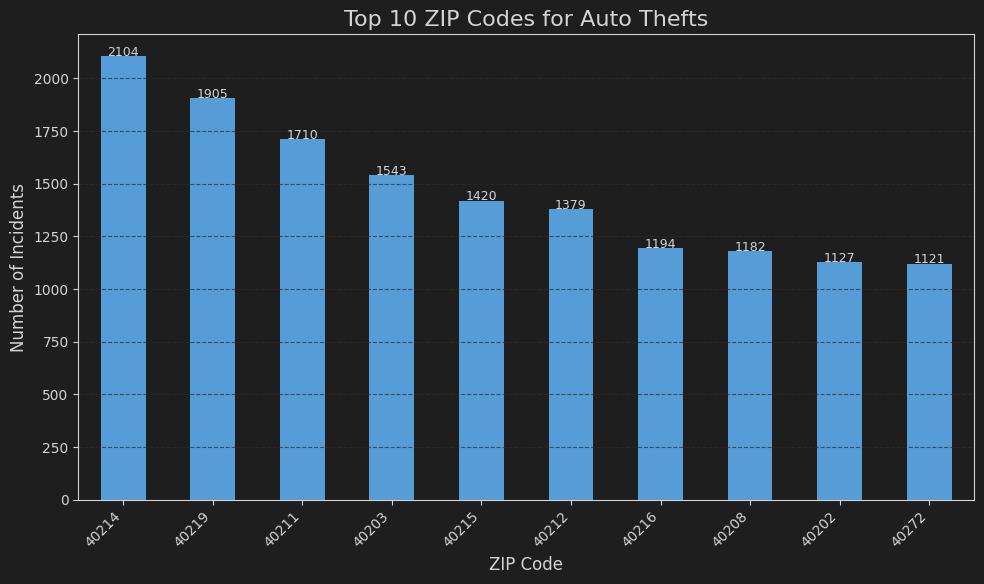

In [51]:
import matplotlib.pyplot as plt
from style_config import apply_dark_mode_style, COLORS, FONT_SIZES

# Apply dark mode style
apply_dark_mode_style()

# Count incidents by ZIP code
theft_by_zip = cleaned_data['zip'].value_counts().head(10)

# Plot the data
plt.figure(figsize=FIGURE_SIZE)
theft_by_zip.plot(
    kind='bar',
    color=COLORS['primary'],
    title="Top 10 ZIP Codes for Auto Thefts"
)
plt.title("Top 10 ZIP Codes for Auto Thefts", fontsize=FONT_SIZES['title'])
plt.xlabel("ZIP Code", fontsize=FONT_SIZES['axes'])
plt.ylabel("Number of Incidents", fontsize=FONT_SIZES['axes'])
plt.xticks(rotation=45, ha='right', fontsize=FONT_SIZES['ticks'])
plt.yticks(fontsize=FONT_SIZES['ticks'])
plt.grid(axis='y', color=COLORS['grid'], linestyle='--', alpha=0.7)

# Annotate bars with values
for index, value in enumerate(theft_by_zip):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=FONT_SIZES['annotations'])

plt.tight_layout()
plt.show()


# Trends by Day of Week and Top 10 Locations
Filters the top 10 locations by incidents and visualizes their trends using a heatmap.
- **Insights**: Most reported incidents occur on Monday and are stolen from one's home.

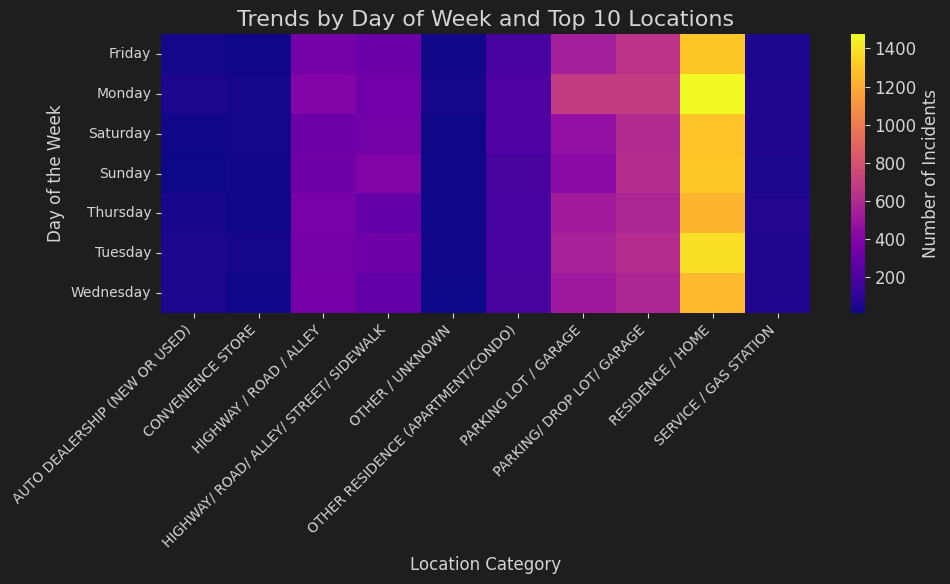

In [52]:
# Filter top 10 locations by total incidents
top_locations = (
    cleaned_data['location_category']
    .value_counts()
    .head(10)
    .index
)
filtered_data = cleaned_data[cleaned_data['location_category'].isin(top_locations)]

# Create the grouped trends
combined_trends = filtered_data.groupby(
    ['week_day_reported', 'location_category'], observed=True
).size().unstack()

plt.figure(figsize=FIGURE_SIZE)
sns.heatmap(
    combined_trends,
    annot=False,
    cmap="plasma",
    cbar_kws={'label': 'Number of Incidents'}
)
plt.title("Trends by Day of Week and Top 10 Locations", fontsize=FONT_SIZES['title'])
plt.xlabel("Location Category", fontsize=FONT_SIZES['axes'])
plt.ylabel("Day of the Week", fontsize=FONT_SIZES['axes'])
plt.xticks(rotation=45, ha='right', fontsize=FONT_SIZES['ticks'])
plt.yticks( fontsize=FONT_SIZES['ticks'])
plt.tight_layout()
plt.show()


# Yearly Trends by ZIP Code
Groups incidents by year and ZIP code, then visualizes trends for the top ZIP codes using line plots.


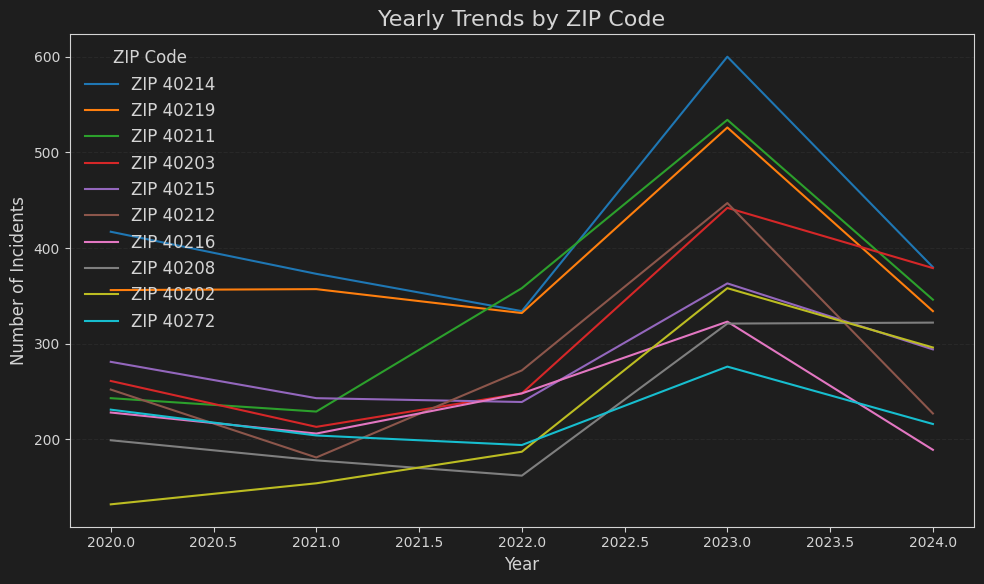

In [53]:
# Group by year and ZIP code
yearly_zip_trends = cleaned_data.groupby(['year_reported', 'zip']).size().unstack(fill_value=0)

# Line plot for selected ZIP codes
top_zip_codes = theft_by_zip.index  # Use top ZIP codes from previous analysis
plt.figure(figsize=FIGURE_SIZE)
for zip_code in top_zip_codes:
    plt.plot(
        yearly_zip_trends.index,
        yearly_zip_trends[zip_code],
        label=f"ZIP {zip_code}"
    )

# Customize the plot
plt.title("Yearly Trends by ZIP Code", fontsize=FONT_SIZES['title'])
plt.xlabel("Year", fontsize=FONT_SIZES['axes'])
plt.ylabel("Number of Incidents", fontsize=FONT_SIZES['axes'])
plt.xticks(fontsize=FONT_SIZES['ticks'])
plt.yticks(fontsize=FONT_SIZES['ticks'])
plt.grid(axis='y', color=COLORS['grid'], linestyle='--', alpha=0.7)
plt.legend(title="ZIP Code", fontsize=FONT_SIZES['axes'])
plt.tight_layout()
plt.show()


# Personal Analysis of My Car Theft Incident
My car was stolen sometime between 4:00 pm December 4th and 7:00 am December 5th from my home in Old Louisville.
This code filters and calculates statistics related to my incident.
- **December incidents**: Total and percentage of thefts occurring in December.
- **Local incidents**: Total thefts reported in my ZIP code (`40203`).
- **Timeframe incidents**: Theft incidents occurring between 4:00 pm and 7:00 am.
- **Location category**: Thefts from "RESIDENCE / HOME"
- **All conditions**: Incidents matching all these criteria


In [54]:
# Define parameters
offense_type = 'AUTO THEFT'
location_type = 'RESIDENCE / HOME'

# Filter incidents for December
december_incidents = cleaned_data[cleaned_data['date_occurred'].dt.month == 12]
total_december_incidents = len(december_incidents)


# Filter incidents for zipcode
local_incidents = cleaned_data[cleaned_data['zip']== '40203']
total_local_incidents = len(local_incidents)

# Filter for incidents between 4 PM and 7 AM
timeline_incidents = cleaned_data[
    (cleaned_data['date_occurred'].dt.hour >= 16) |  # From 4 PM
    (cleaned_data['date_occurred'].dt.hour < 7)      # Until 7 AM
]
total_timeline_incidents = len(timeline_incidents)
# Filter for location category
location_incidents = cleaned_data[cleaned_data['location_category']== location_type]
total_location_incidents = len(location_incidents)


# Calculate percentage
total_auto_thefts = len(cleaned_data[cleaned_data['offense_classification'] == offense_type])
december_percentage = ((total_december_incidents / total_auto_thefts) * 100)
local_percentage = ((total_local_incidents / total_auto_thefts) * 100)
timeline_percentage = ((total_timeline_incidents / total_auto_thefts) * 100)
location_percentage = ((total_location_incidents / total_auto_thefts) * 100)
# Filter incidents matching all conditions
combined_incidents = cleaned_data[
    (cleaned_data['offense_classification'] == offense_type) &
    (cleaned_data['date_occurred'].dt.month == 12) &
    (cleaned_data['zip'] == '40203') &
    (cleaned_data['location_category'] == location_type) &
    ((cleaned_data['date_occurred'].dt.hour >= 16) | (cleaned_data['date_occurred'].dt.hour < 7))
]
total_combined_incidents = len(combined_incidents)

# Calculate combined percentage
combined_percentage = (total_combined_incidents / total_auto_thefts) * 100

# Output additional results
print(f"Total incidents matching all conditions: {total_combined_incidents}")
print(f"Percentage of incidents matching all conditions: {combined_percentage:.2f}%")


# Output results
print(f"Total auto thefts: {total_auto_thefts}")
print(f"Total incidents in December: {total_december_incidents}")
print(f"Total local incidents (40203): {total_local_incidents}")
print(f"Total incidents at RESIDENCE/ HOME: {total_location_incidents}")
print(f"Total incidents in the same timeframe: {total_timeline_incidents}")
print(f"Percentage of incidents in december: {december_percentage:.2f}%")
print(f"Percentage of incidents in my zip code: {local_percentage:.2f}%")
print(f"Percentage of incidents from the same location category: {location_percentage:.2f}%")
print(f"Percentage of incidents during the same timeframe: {timeline_percentage:.2f}%")


Total incidents matching all conditions: 13
Percentage of incidents matching all conditions: 0.05%
Total auto thefts: 25814
Total incidents in December: 1851
Total local incidents (40203): 1543
Total incidents at RESIDENCE/ HOME: 9237
Total incidents in the same timeframe: 19203
Percentage of incidents in december: 7.17%
Percentage of incidents in my zip code: 5.98%
Percentage of incidents from the same location category: 35.78%
Percentage of incidents during the same timeframe: 74.39%


# Incidents per 100 People by ZIP Code
Calculates and visualizes the rate of auto theft incidents per 100 residents for each ZIP code:
- **Insights**:40225 is only estimated to have 15 people living there and is listed as "GE Electric" under the column "unnaccepatable cities" in the raw zip file. 40209 is the ZIP code for the airport (~300 population) and likely contributes to its place on this list.


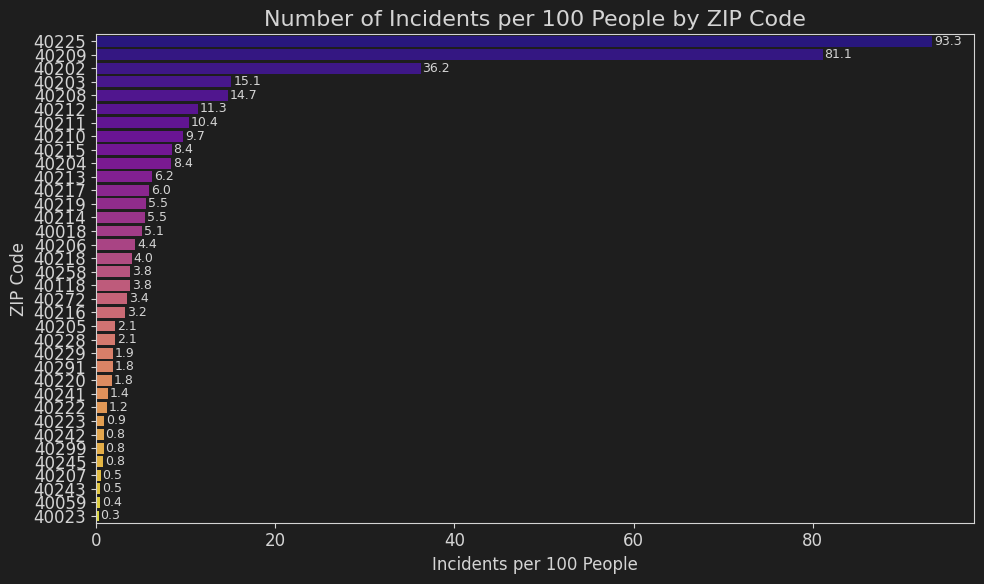

In [55]:
# Group by ZIP and calculate number of incidents
incidents_per_zip = cleaned_data.groupby('zip').agg({
    'incident_number': 'count',
    'irs_estimated_population': 'first'
}).reset_index()

# Calculate incidents per 100 people
incidents_per_zip['incidents_per_100_people'] = (
    incidents_per_zip['incident_number'] / incidents_per_zip['irs_estimated_population'] * 100
)

# Remove rows with zero or missing population
incidents_per_zip = incidents_per_zip[incidents_per_zip['irs_estimated_population'] > 0]

# Sort the data for better visualization
incidents_per_zip = incidents_per_zip.sort_values(by='incidents_per_100_people', ascending=False)

# Create a bar plot
plt.figure(figsize=FIGURE_SIZE)
sns.barplot(
    data=incidents_per_zip,
    x='incidents_per_100_people',
    y='zip',
    hue='zip',
    palette='plasma',
 
)
plt.title('Number of Incidents per 100 People by ZIP Code', fontsize=FONT_SIZES['title'], color=COLORS['text'])
plt.xlabel('Incidents per 100 People', fontsize=FONT_SIZES['axes'], color=COLORS['text'])
plt.ylabel('ZIP Code', fontsize=FONT_SIZES['axes'], color=COLORS['text'])

# Add annotations
for i, value in enumerate(incidents_per_zip['incidents_per_100_people']):
    plt.text(value + 0.2, i, f'{value:.1f}', ha='left', va='center', fontsize=FONT_SIZES['annotations'], color=COLORS['text'])

plt.tight_layout()
plt.show()
